In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

We consider a block of t metres thickness (user input). Then we apply MC to understand where the reaction might take place in the block. We calculate the new energy after loss there. It will be used in the reaction. Again theta for the reaction is calculated using MC. Then we calculate the fnal energy after considering energy loss of the projectile. (Initial energy will also be user input).

In [ ]:
n=int(input("Enter the no. of plots you want to make"))

Enter the no. of plots you want to make2


In [ ]:
reac=[]
for i in range(0,n):

  rc=input("Enter the name of reaction"+str(i+1))
  reac.append(rc)

Enter the name of reaction11
Enter the name of reaction22


In [ ]:
d=np.loadtxt("nuclear_multi.txt", unpack=True, delimiter=" ") #loading input file

In [ ]:
NEvents=10000

In [ ]:
# taking thickness and initial energy as input

t=np.array(d[9])  # in micron
E_given=np.array(d[10]) # in keV

In [ ]:
# calculating probable place of reaction in the block using MC

samples=np.array([])
th=np.array([])
for j in range(n):
  samples=np.append(samples,t[j]*np.random.rand(10000))
  th=np.append(th,180*np.random.rand(10000))
q=0
s=0
p=0
x=np.array([])
x=samples
x=x.reshape(n,10000)
angles=np.array([])
angles=th
angles=angles.reshape(n,10000)
for i in range(0,n):
   angles[i]=np.sort(angles[i])

In [ ]:
np.shape(angles)

(2, 10000)

In [ ]:
x=x*(1e-6)  # in m
t=t*(1e-6)   # in m

In [ ]:
x

array([[1.43276320e-05, 1.39524445e-05, 4.03336559e-06, ...,
        3.78437812e-06, 1.02295360e-05, 1.97701821e-06],
       [6.45674506e-06, 8.52154233e-06, 1.32590912e-06, ...,
        1.19497863e-05, 1.37685519e-05, 8.52166901e-06]])

In [ ]:
# parameters

z=np.array(d[0]) # at. no. of projectile
a=np.array(d[1]) # at. mass of projectile
Z=np.array(d[2]) # at. no. of target
A=np.array(d[3]) # at. mass of target
b=np.array(d[4]) # at. mass of lighter product
B=np.array(d[5]) # at. mass of heavier product
z2=np.array(d[6])  # at. no. of lighter product
rho=np.array(d[7])  # density of target in kg/m ^3
I=np.array(d[8])  # ionisation potential of target in keV
r=np.array(d[11])  # radius of target in m
e=1.6e-19  # in coulomb
K=9e+9  # electrostatic constant
Na=6.022e+23  # avogadro no.
E_in_J=(1.60218e-16)*E_given  # from keV to J
q=((B+b)-(A+a))*931.25*1000  # in keV

In [ ]:
I

array([0.0074166, 0.01122  ])

In [ ]:
E_given

array([35000., 35000.])

In [ ]:
E_in_J

array([5.60763e-12, 5.60763e-12])

In [ ]:
# E_in_J=np.array([])
# E_given=np.array([])
# for j in range(0,n):
#   for i in range(0,10000):
#    E_in_J=np.append(E_in_J,E_in_J_init[j])
#    E_given=np.append(E_given,E_given_init[j])
# E_in_J=E_in_J.reshape(n,10000)
# E_given=E_given.reshape(n,10000)

In [ ]:
# calculating energy loss before reaction while penetrating target

delE=((4*np.pi*Z*rho*Na)/(A*2*E_in_J))*(z*z*e*e*e*e*K*K)*np.log((4*E_given)/I)

E_left_J=np.array([])
E_left=np.array([])

for i in range (0,n):
  E_l = E_in_J[i] - (delE[i]*x[i])  # energy left after 1st loss in J
  E_left_J = np.append(E_left_J,E_l)

E_left_J = E_left_J.reshape(n,10000)
E_left = E_left_J/(1.60218e-16)  # energy left in keV

In [ ]:
delE[1]

1.0300456090494749e-14

In [ ]:
(delE[1]*x[1][1])/(1.60218e-13)

5.478521301672637e-07

In [ ]:
print((E_left_J[1][1])/(1.60218e-13))

34.9999998771846


In [ ]:
print(x[1][1])

1.910326778700397e-06


In [ ]:
# # calculating energy of product after reaction
# y = np.zeros((n, 10000))

# for i in range(n):
#     y1 = ((np.sqrt(a[i]*b[i]*E_left[i][:, None])*np.cos(angles[i]*np.pi/180)
#            +np.sqrt(a[i]*b[i]*E_left[i][:, None]*np.cos(angles[i]*np.pi/180)**2+
#             (B[i]+b[i])*(q[i]*B[i]+(B[i]-a[i])*E_left[i][:, None])))/(b[i] + B[i]))**2
#     y[i, :, :] = y1 # energy after reaction in keV

In [ ]:
E_left[1]

array([34777.76761337, 34855.50245643, 34507.51871653, ...,
       34692.21433963, 34679.81701792, 34485.25753756])

In [ ]:
# calculating energy of product after reaction
y = np.zeros((n, 10000))

for i in range(n):
    y1 = ((np.sqrt(a[i]*b[i]*E_left[i])*np.cos(angles[i]*np.pi/180)
           +np.sqrt(a[i]*b[i]*E_left[i]*np.cos(angles[i]*np.pi/180)**2+
            (B[i]+b[i])*(q[i]*B[i]+(B[i]-a[i])*E_left[i])))/(b[i] + B[i]))**2
    y[i, :] = y1[:] # energy after reaction in keV

In [ ]:
# calculating distance left to penetrate by lighter product
dis=np.zeros((n,10000))
for i in range(0,n):
  for j in range(NEvents):
    if angles[i][j]<90:
      d1=(t[i]-x[i][:])/(np.cos(angles[i][j]*np.pi/180))
    elif (angles[i][j]>90):
      d1=x[i][:]/(np.cos((180-angles[i][j])*np.pi/180))
    # else:
    #   d1=r[i]
    dis[i]=d1 # distance left to penetrate

In [ ]:
dis

array([[12.40389468,  5.79455841,  2.36821355, ...,  6.77981088,
        12.13011153,  1.94032804],
       [ 5.98838774,  3.89370483, 13.27065296, ...,  8.29375008,
         8.62781466, 13.87051409]])

In [ ]:
# calculating energy loss after reaction while penetrating target
delE2_left=np.zeros((n,10000))
# delE=((4*np.pi*Z*rho*Na)/(A*2*y/6.242e+15))*(z2*z2*e*e*e*e*K*K)*np.log((4*y)/I)
for i in range(0,n):
  # delE=((4*np.pi*Z*rho*Na)/(A*2*E_in_J))*(z*z*e*e*e*e*K*K)*np.log((4*E_given)/I)
  delE2_f=(z2[i]*z2[i]*e*e*e*e*K*K)*((4*np.pi*Z[i]*rho[i]*Na)/(A[i]*2*(y[i]/6.242e+15)))*np.log((4*y[i])/I[i])
  delE2_left_f=(y[i]/6.242e+15-(delE2_f*dis[i]))*6.242e+15
  delE2_left[i,:]=delE2_left_f

# delE2_left=delE2_left.reshape(n,10000)  #  final energy in keV


In [ ]:
(y[1]/6.242e+15)-(delE2_f*dis[1])

array([ 5.53576247e-12,  5.56078745e-12,  5.44836003e-12, ...,
       -1.29499919e-13, -1.50519973e-13, -4.82073756e-13])

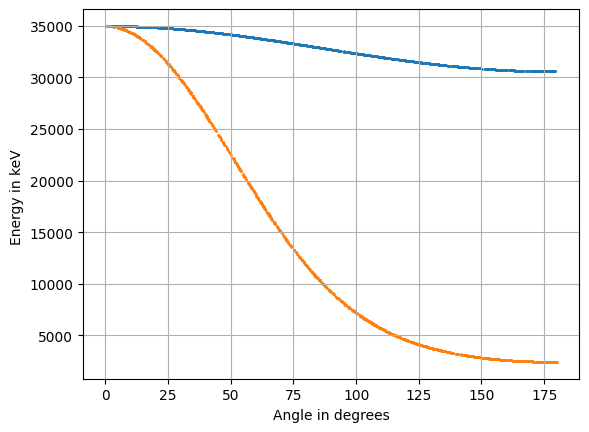

In [ ]:
plt.xlabel("Angle in degrees")
plt.ylabel("Energy in keV ")
plt.grid()
for i in range(n):
  # for j in range(10000):
  plt.scatter (angles[i],delE2_left[i,j,:],s=1, label=reac[i])
# plt.legend()